<a href="https://colab.research.google.com/github/serebris/LIS706_Wisconsin-Homicide/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading in the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Mounted at /content/drive


In [ ]:
import seaborn as sn

In [ ]:
# Load the CSV file
murder = pd.read_csv('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/crimes1.csv')

# Initial Exploration

In [ ]:
murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849144 entries, 0 to 849143
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CNTYFIPS      849144 non-null  object
 1   STATE         849144 non-null  object
 2   COUNTY        849144 non-null  object
 3   STATE.1       839993 non-null  object
 4   Solved        849144 non-null  object
 5   Year          849144 non-null  int64 
 6   Month         849144 non-null  object
 7   Homicide      849144 non-null  object
 8   VicAge        849144 non-null  int64 
 9   VicSex        849144 non-null  object
 10  VicRace       849144 non-null  object
 11  OffAge        849144 non-null  int64 
 12  OffSex        849144 non-null  object
 13  OffRace       849144 non-null  object
 14  Weapon        849144 non-null  object
 15  Relationship  849144 non-null  object
 16  Circumstance  849144 non-null  object
dtypes: int64(3), object(14)
memory usage: 110.1+ MB


In [ ]:
# Display the contents of the CSV file
murder.head()

,CNTYFIPS,STATE,COUNTY,STATE.1,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance
0,"Juneau, AK","Juneau, AK",Juneau,AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,55,Female,Native American,Knife or cutting instrument,Husband,Other arguments
1,"Jefferson, AL","Jefferson, AL",Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen
2,"Jefferson, AL","Jefferson, AL",Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,53,Male,Black,Shotgun,Wife,Other
3,"Jefferson, AL","Jefferson, AL",Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,35,Female,Black,Knife or cutting instrument,Brother,Other arguments
4,"Mobile, AL","Mobile, AL",Mobile,AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,25,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined


In [ ]:
murder[['Weapon']].value_counts()

Weapon                              
Handgun - pistol, revolver, etc         412283
Knife or cutting instrument             121415
Firearm, type not stated                 80905
Personal weapons, includes beating       47800
Other or type unknown                    46564
Shotgun                                  39516
Blunt object - hammer, club, etc         36487
Rifle                                    31242
Strangulation - hanging                  10126
Fire                                      7995
Asphyxiation - includes death by gas      5123
Other gun                                 3617
Narcotics or drugs, sleeping pills        3067
Drowning                                  1514
Explosives                                 634
Poison - does not include gas              595
Pushed or thrown out window                261
dtype: int64

In [ ]:
# In percentage
murder[['Weapon']].value_counts(normalize = True)

Weapon                              
Handgun - pistol, revolver, etc         0.485528
Knife or cutting instrument             0.142985
Firearm, type not stated                0.095278
Personal weapons, includes beating      0.056292
Other or type unknown                   0.054836
Shotgun                                 0.046536
Blunt object - hammer, club, etc        0.042969
Rifle                                   0.036792
Strangulation - hanging                 0.011925
Fire                                    0.009415
Asphyxiation - includes death by gas    0.006033
Other gun                               0.004260
Narcotics or drugs, sleeping pills      0.003612
Drowning                                0.001783
Explosives                              0.000747
Poison - does not include gas           0.000701
Pushed or thrown out window             0.000307
dtype: float64

In [ ]:
# Descriptive statistics on non-numeric (object) columns
statistics = murder.describe(include=['object'])
print(statistics)

               CNTYFIPS            STATE       COUNTY STATE.1  Solved   Month  \
count            849144           849144       849144  839993  849144  849144   
unique             3070             3070         1798      50       2      12   
top     Los Angeles, CA  Los Angeles, CA  Los Angeles      CA     Yes    July   
freq              54187            54187        54187  125258  598354   77992   

                                    Homicide  VicSex VicRace  OffSex OffRace  \
count                                 849144  849144  849144  849144  849144   
unique                                     2       3       6       3       6   
top     Murder or Non-negligent manslaughter    Male   White    Male   Black   
freq                                  833685  658240  416005  529695  287926   

                                 Weapon                 Relationship  \
count                            849144                       849144   
unique                               17          

# Cleaning the Data

In [ ]:
# Renaming the 2 columns and dropping the first two columns from the dataframe
murder = murder.drop(columns=['CNTYFIPS', 'STATE'])
murder = murder.rename(columns={'COUNTY':'County', 'STATE.1':'State'})
murder.head()

,County,State,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance
0,Juneau,AK,Yes,1976,January,Murder or Non-negligent manslaughter,48,Male,Native American,55,Female,Native American,Knife or cutting instrument,Husband,Other arguments
1,Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,65,Male,Black,67,Male,Black,Shotgun,Acquaintance,Felon killed by private citizen
2,Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,45,Female,Black,53,Male,Black,Shotgun,Wife,Other
3,Jefferson,AL,Yes,1976,January,Murder or Non-negligent manslaughter,43,Male,Black,35,Female,Black,Knife or cutting instrument,Brother,Other arguments
4,Mobile,AL,Yes,1976,January,Murder or Non-negligent manslaughter,35,Male,White,25,Female,White,Strangulation - hanging,Acquaintance,Circumstances undetermined


In [ ]:
# Trim white spaces in the 'State' column
murder['State'] = murder['State'].str.strip()

In [ ]:
# Dictionary to map month names to numbers
month_dict = {
    'January': '1',
    'February': '2',
    'March': '3',
    'April': '4',
    'May': '5',
    'June': '6',
    'July': '7',
    'August': '8',
    'September': '9',
    'October': '10',
    'November': '11',
    'December': '12'
}
# Map full month names to numbers
murder['Month'] = murder['Month'].map(month_dict)

# Age Exploration

In [ ]:
# In percentage
murder[['OffAge']].value_counts(normalize = True)

OffAge
999       0.334001
20        0.032369
19        0.030303
21        0.029105
22        0.028807
            ...   
95        0.000016
98        0.000015
96        0.000012
2         0.000009
97        0.000006
Length: 101, dtype: float64

In [ ]:
# In percentage
murder[['VicAge']].value_counts(normalize = True)

VicAge
22        0.035418
25        0.035278
21        0.034932
20        0.034743
23        0.034642
            ...   
94        0.000183
95        0.000139
97        0.000071
96        0.000066
98        0.000044
Length: 101, dtype: float64

In [ ]:
# For WI
offage_value_counts = murder[murder['State'] == 'WI']['OffAge'].value_counts(normalize=True)
print(offage_value_counts)

999    0.203539
19     0.039896
20     0.038093
22     0.037417
23     0.035163
         ...   
90     0.000113
6      0.000113
85     0.000113
99     0.000113
88     0.000113
Name: OffAge, Length: 82, dtype: float64


In [ ]:
vicage_value_counts = murder[murder['State'] == 'WI']['VicAge'].value_counts(normalize=True)
print(vicage_value_counts)

23    0.036515
19    0.036290
22    0.034149
20    0.034149
21    0.033923
        ...   
89    0.000451
96    0.000338
93    0.000225
97    0.000225
95    0.000113
Name: VicAge, Length: 98, dtype: float64


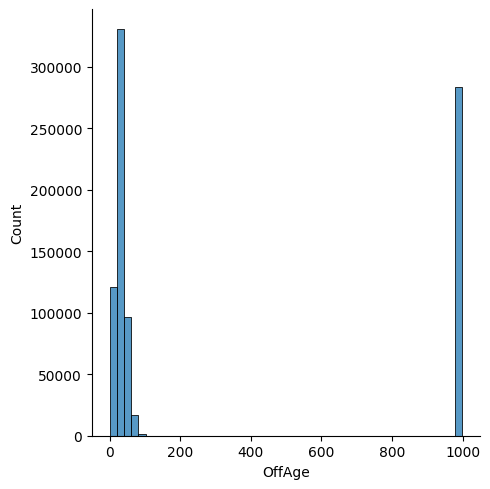

In [ ]:
sn.displot(murder, x="OffAge")

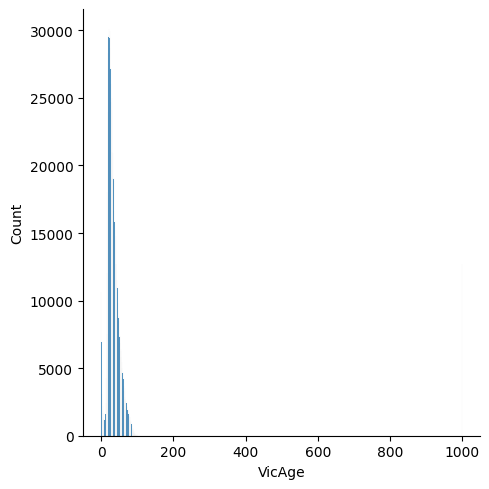

In [ ]:
sn.displot(murder, x="VicAge")

A New DataFrame named murder1, where 999 in age are dropped

## Dropping missing values in Age columns

In [ ]:
murder.drop(murder[murder['VicAge'] == 999].index, inplace=True)
murder.drop(murder[murder['OffAge'] == 999].index, inplace=True)

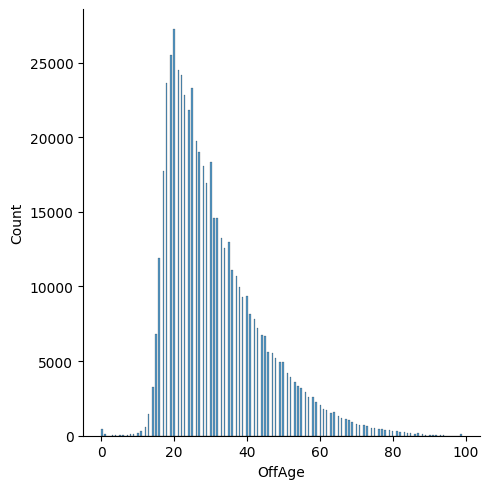

In [ ]:
sn.displot(murder, x="OffAge")

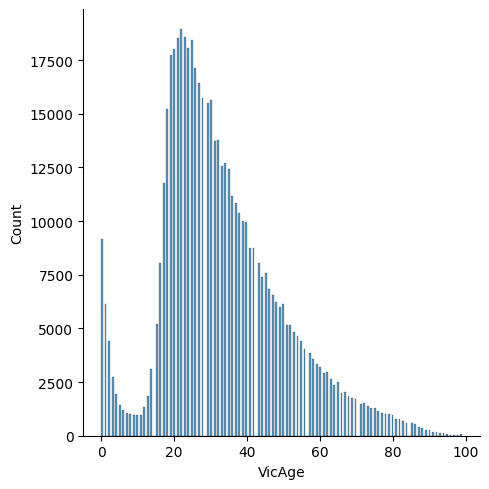

In [ ]:
sn.displot(murder, x="VicAge")

# Creating a new dataframe 'wisc' and encoding some values

WI murder between 2000 and 2021, where 999s are dropped

In [ ]:
wisc = murder.loc[(murder['State'] == 'WI') & ((murder['Year'] >= 2000) & (murder['Year'] <= 2021))]

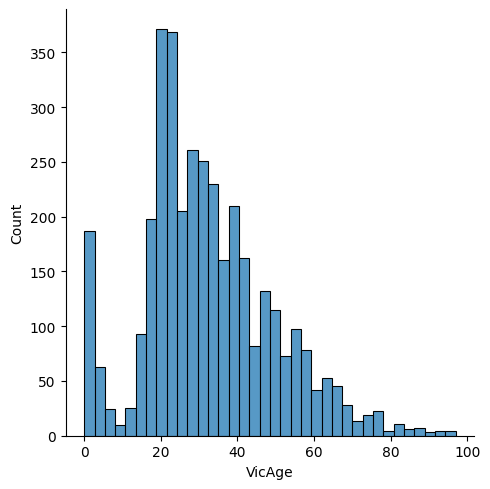

In [ ]:
# Plot the data between years 2000 and 2021
sn.displot(wisc, x="VicAge")

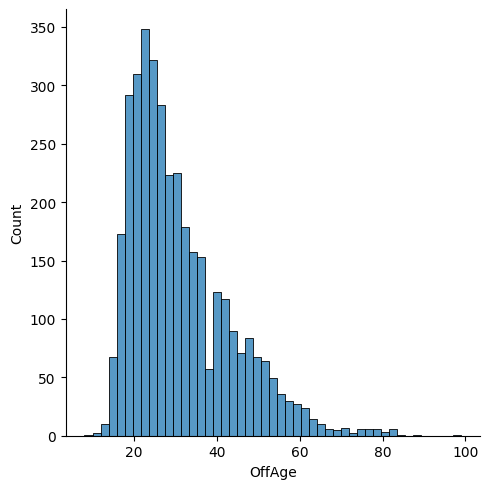

In [ ]:
sn.displot(wisc, x="OffAge")

In [ ]:
wisc['OffAge'].agg(['mean', 'median', 'min', 'max'])

mean      30.973756
median    28.000000
min        8.000000
max       99.000000
Name: OffAge, dtype: float64

In [ ]:
wisc['VicAge'].agg(['mean', 'median', 'min', 'max'])

mean      32.29333
median    30.00000
min        0.00000
max       97.00000
Name: VicAge, dtype: float64

In [ ]:
# Grouping by County to see the Offenders' age with mean, median, min, and max values
wisc.groupby('County')[['OffAge']].agg(['mean', 'median', 'min', 'max'])

OffAge               
                mean median min max
County                             
Adams      42.000000   46.0  19  62
Ashland    34.153846   38.0  14  55
Barron     37.066667   43.0  18  55
Bayfield   48.000000   55.0  20  62
Brown      32.453704   29.5  15  65
...              ...    ...  ..  ..
Waukesha   35.756757   33.5  16  81
Waupaca    29.923077   23.0  16  59
Waushara   57.500000   57.5  51  64
Winnebago  33.586957   31.5  16  64
Wood       39.368421   36.0  17  59

[72 rows x 4 columns]

In [ ]:
# Grouping by State to see the average victims' age, sort by Age
murder.groupby('State')[['VicAge']].mean( ).sort_values(by = 'VicAge')

,VicAge
State,
IL,30.712290
UT,31.599319
WI,31.662443
MD,31.911563
LA,32.091027
CA,32.161073
NE,32.179221
AK,32.211069
WY,32.239637


In [ ]:
# Number of records in murder dataframe
len(murder)

560406

In [ ]:
# Number of records in wisc dataframe (only WI between years 2000 and 2021)
len(wisc) # dropped 999

3658

# Encoding the values

In [ ]:
# Now dropping column 'State' from the dataframe
wisc.drop('State', axis=1, inplace=True)

<ipython-input-10-534d9326ff8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc.drop('State', axis=1, inplace=True)


In [ ]:
# Convert 'Yes' to 1 and 'No' to 0 in the 'Solved' column
wisc['Solved'] = wisc['Solved'].map({'Yes': 1, 'No': 0})

<ipython-input-11-06a4d3ed0c40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['Solved'] = wisc['Solved'].map({'Yes': 1, 'No': 0})


In [ ]:
# Mapping values using a dictionary
gender = {'Male': 'M', 'Female': 'F', 'Unknown': 'U'}

# Applying the mapping to the 'OffSex' and 'VicSex' columns
wisc['OffSex'] = wisc['OffSex'].map(gender)
wisc['VicSex'] = wisc['VicSex'].map(gender)

<ipython-input-12-6c7180997be1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['OffSex'] = wisc['OffSex'].map(gender)
<ipython-input-12-6c7180997be1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['VicSex'] = wisc['VicSex'].map(gender)


In [ ]:
wisc['VicRace'].unique()

array(['Black', 'White', 'Native American', 'Asian', 'Unknown',
       'Pacific Islander'], dtype=object)

In [ ]:
# “A” = “Asian or Pacific Islander” or “B” = “Black” or “I” = “American Indian or Alaskan Native” or “W” = “White” or “U” = “Unknown” race

# Mapping values using a dictionary
race = {'Asian' or 'Pacific Islander': 'A', 'Black': 'B', 'American Indian' or 'Alaskan Native': 'I', 'White': 'W', 'Unknown': 'U'}

# Applying the mapping to the 'OffSex' and 'VicSex' columns
wisc['OffRace'] = wisc['OffRace'].map(race)
wisc['VicRace'] = wisc['VicRace'].map(race)

<ipython-input-16-e61314a81bf3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['OffRace'] = wisc['OffRace'].map(race)
<ipython-input-16-e61314a81bf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['VicRace'] = wisc['VicRace'].map(race)


Encoding Firearm vs. not Firearm and renaming a column 'Weapon' into 'Firearm'

In [ ]:
wisc['Weapon'].unique()

array(['Handgun - pistol, revolver, etc', 'Other or type unknown',
       'Knife or cutting instrument',
       'Asphyxiation - includes death by gas',
       'Personal weapons, includes beating', 'Shotgun',
       'Blunt object - hammer, club, etc', 'Rifle',
       'Firearm, type not stated', 'Narcotics or drugs, sleeping pills',
       'Other gun', 'Fire', 'Explosives'], dtype=object)

In [ ]:
# Create a list of firearms-related values
firearm_types = ['Handgun - pistol, revolver, etc', 'Shotgun', 'Rifle', 'Other gun', 'Firearm, type not stated']

# Writing a function to encode firearm vs non-firearm
def encode_firearm(weapon):
    if any(firearm_type in weapon for firearm_type in firearm_types):
        return 1  # If it's any type of firearm
    else:
        return 0  # If it's not a firearm

# Assuming wisc is your DataFrame and 'Weapon' is the column name
wisc['Firearm'] = wisc['Weapon'].apply(encode_firearm)

<ipython-input-17-3ef602b2bf97>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['Firearm'] = wisc['Weapon'].apply(encode_firearm)


Encoding 'Homicide' column and renaming it into 'Murder'

In [ ]:
wisc['Homicide'].unique()

array(['Murder or Non-negligent manslaughter',
       'Manslaughter by negligence'], dtype=object)

In [ ]:
wisc['Murder'] = wisc['Homicide'].map({'Murder or Non-negligent manslaughter': 1, 'Manslaughter by negligence': 0})

<ipython-input-18-7888949ccc77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wisc['Murder'] = wisc['Homicide'].map({'Murder or Non-negligent manslaughter': 1, 'Manslaughter by negligence': 0})


In [ ]:
wisc.head()

,County,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Firearm,Murder
480763,Dane,1,2000,1,Murder or Non-negligent manslaughter,13,M,B,17,M,B,"Handgun - pistol, revolver, etc",Stranger,Robbery,1,1
480764,Milwaukee,1,2000,1,Manslaughter by negligence,88,F,W,66,M,W,Other or type unknown,Mother,All other manslaughter by negligence,0,0
480910,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,13,F,B,24,M,B,"Handgun - pistol, revolver, etc",Acquaintance,Other - not specified,1,1
480991,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,55,F,W,60,M,W,"Handgun - pistol, revolver, etc",Other - known to victim,Lovers triangle,1,1
481066,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,29,M,B,23,M,B,Knife or cutting instrument,Acquaintance,Other arguments,0,1


In [ ]:
# Resetting the index
wisc = wisc.reset_index(drop=True)

Saving a new wisc_all.csv file, 999 dropped, no binning the Age yet

In [ ]:
# saving the dataframe to a .csv file
from pathlib import Path
filepath = Path('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc_all.csv', index=False)
filepath.parent.mkdir(parents=True, exist_ok=True)
wisc.to_csv(filepath)

## Binning

In [ ]:
# Specify the bin edges
bins = [0, 18, 25, 30, 35, 45, 60, 99]

# Create labels for each bin
labels = ['0-18', '19-25', '26-30', '31-35', '36-45', '46-60', '61-99']

# Bin the 'VicAge' column
wisc['VicAge'] = pd.cut(wisc['VicAge'], bins=bins, labels=labels, right=False)

# Bin the 'OffAge' column
wisc['OffAge'] = pd.cut(wisc['OffAge'], bins=bins, labels=labels, right=False)

In [ ]:
print(wisc['VicAge'].isnull().sum())
print(wisc['OffAge'].isnull().sum())


0
1


In [ ]:
# Identify and display the row where 'OffAge' is missing
missing_offage_row = wisc[wisc['OffAge'].isnull()]
print("Row with missing 'OffAge':")
print(missing_offage_row)


Row with missing 'OffAge':
         County  Solved  Year Month                              Homicide  \
2637  Milwaukee       1  2017     9  Murder or Non-negligent manslaughter   

     VicAge VicSex VicRace OffAge OffSex OffRace  \
2637  36-45      M       B    NaN      M       W   

                               Weapon Relationship            Circumstance  \
2637  Handgun - pistol, revolver, etc     Stranger  Felon killed by police   

      Firearm  Murder  
2637        1       1  


In [ ]:
# Drop the row with index 2637 in place
wisc.drop(2637, inplace=True)

In [ ]:
print(wisc['OffAge'].isnull().sum())

0


In [ ]:
wisc.columns

Index(['County', 'Solved', 'Year', 'Month', 'Homicide', 'VicAge', 'VicSex',
       'VicRace', 'OffAge', 'OffSex', 'OffRace', 'Weapon', 'Relationship',
       'Circumstance', 'Firearm', 'Murder'],
      dtype='object')

In [ ]:
wisc.head()

,County,Solved,Year,Month,Homicide,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,Firearm,Murder
0,Dane,1,2000,1,Murder or Non-negligent manslaughter,0-18,M,B,0-18,M,B,"Handgun - pistol, revolver, etc",Stranger,Robbery,1,1
1,Milwaukee,1,2000,1,Manslaughter by negligence,61-99,F,W,61-99,M,W,Other or type unknown,Mother,All other manslaughter by negligence,0,0
2,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,0-18,F,B,19-25,M,B,"Handgun - pistol, revolver, etc",Acquaintance,Other - not specified,1,1
3,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,46-60,F,W,61-99,M,W,"Handgun - pistol, revolver, etc",Other - known to victim,Lovers triangle,1,1
4,Milwaukee,1,2000,1,Murder or Non-negligent manslaughter,26-30,M,B,19-25,M,B,Knife or cutting instrument,Acquaintance,Other arguments,0,1


## Saving a new wisc.csv file, 999 dropped, binned Age

In [ ]:
# saving the dataframe to a .csv file
from pathlib import Path
filepath = Path('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc.csv', index=False)
filepath.parent.mkdir(parents=True, exist_ok=True)
wisc.to_csv(filepath)

## A new basic df wisc_base

In [ ]:
# Now making a new df 'wisc_base' with fewer columns
wisc_base = wisc.drop(['Relationship', 'Circumstance', 'Weapon', 'Homicide'], axis=1)

In [ ]:
wisc_base.head()

,County,Solved,Year,Month,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Firearm,Murder
0,Dane,1,2000,1,0-18,M,B,0-18,M,B,1,1
1,Milwaukee,1,2000,1,61-99,F,W,61-99,M,W,0,0
2,Milwaukee,1,2000,1,0-18,F,B,19-25,M,B,1,1
3,Milwaukee,1,2000,1,46-60,F,W,61-99,M,W,1,1
4,Milwaukee,1,2000,1,26-30,M,B,19-25,M,B,0,1


# Age exploration and binning, mapping

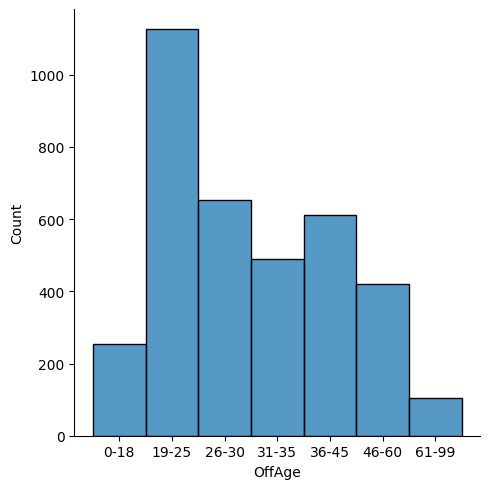

In [ ]:
wisc_base_sorted = wisc_base.sort_values(by='OffAge', ascending=True)

# Create the Seaborn displot
sn.displot(wisc_base_sorted, x="OffAge", kde=False)

# Show the plot
plt.show()

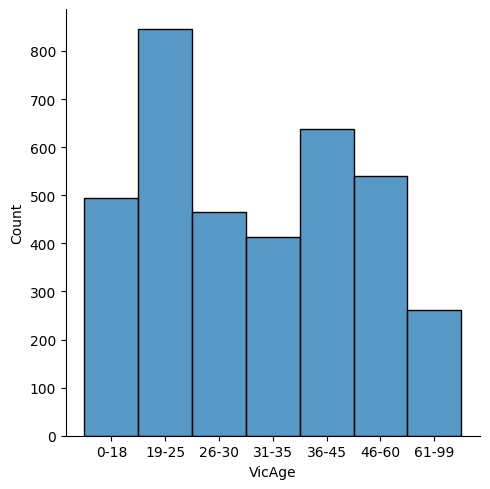

In [ ]:
wisc_base_sortedVic = wisc_base.sort_values(by='VicAge', ascending=True)

# Create the Seaborn displot
sn.displot(wisc_base_sortedVic, x="VicAge", kde=False)

# Show the plot
plt.show()

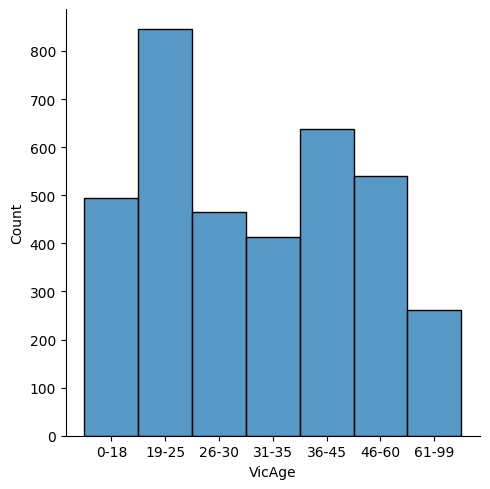

In [ ]:
sn.displot(wisc_base, x="VicAge")

In [ ]:
# Mapping age groups to numerical values
age_mapping = {'0-18': 1, '19-25': 2, '26-30': 3, '31-35': 4, '36-45': 5, '46-60': 6, '61-99': 7}

wisc_base['VicAge'] = wisc_base['VicAge'].map(age_mapping)
wisc_base['OffAge'] = wisc_base['OffAge'].map(age_mapping)

In [ ]:
wisc_base.dtypes

County       object
Solved        int64
Year          int64
Month        object
VicAge     category
VicSex       object
VicRace      object
OffAge     category
OffSex       object
OffRace      object
Firearm       int64
Murder        int64
dtype: object

In [ ]:
# saving the dataframe to a .csv file
filepath = Path('/content/drive/My Drive/LIS 706 Data Mining Planning and Management/LIS 706 Project WI Murder/wisc_base.csv', index=False)
filepath.parent.mkdir(parents=True, exist_ok=True)
wisc_base.to_csv(filepath)

In [ ]:
len(wisc_base)

3657

In [ ]:
wisc_base.head()

,County,Solved,Year,Month,VicAge,VicSex,VicRace,OffAge,OffSex,OffRace,Firearm,Murder
0,Dane,1,2000,1,1,M,B,1,M,B,1,1
1,Milwaukee,1,2000,1,7,F,W,7,M,W,0,0
2,Milwaukee,1,2000,1,1,F,B,2,M,B,1,1
3,Milwaukee,1,2000,1,6,F,W,7,M,W,1,1
4,Milwaukee,1,2000,1,3,M,B,2,M,B,0,1


# Descriptive Statistics for wisc_base

In [ ]:
wisc_base.columns

Index(['County', 'Solved', 'Year', 'Month', 'VicAge', 'VicSex', 'VicRace',
       'OffAge', 'OffSex', 'OffRace', 'Firearm', 'Murder'],
      dtype='object')

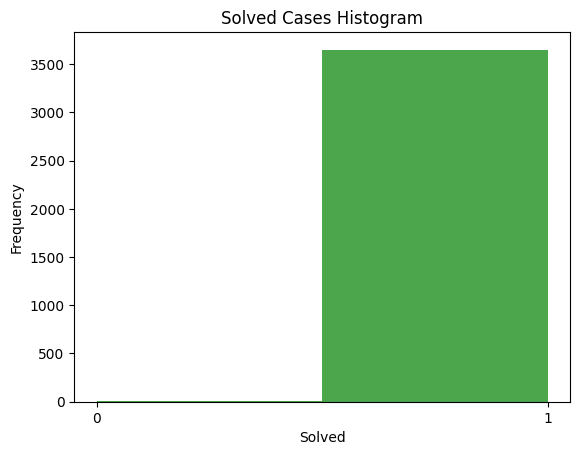

In [ ]:
# Plotting a histogram for the 'Solved' column
plt.hist(wisc_base['Solved'], bins=2, alpha=0.7, color='green')  # Assuming 0 and 1 represent 'No' and 'Yes'
plt.xlabel('Solved')
plt.ylabel('Frequency')
plt.title('Solved Cases Histogram')
plt.xticks([0, 1])  # Label the x-axis with the values 0 and 1
plt.show()

It looks like we have mostly solved cases in the reduced data set. We are using only homicide data from WI between years 2000 and 2021

In [ ]:
statistics_numeric = wisc_base.describe()
print(statistics_numeric)

            Solved         Year      Firearm       Murder
count  3657.000000  3657.000000  3657.000000  3657.000000
mean      0.997812  2011.888980     0.621548     0.916325
std       0.046727     6.562545     0.485068     0.276938
min       0.000000  2000.000000     0.000000     0.000000
25%       1.000000  2006.000000     0.000000     1.000000
50%       1.000000  2013.000000     1.000000     1.000000
75%       1.000000  2018.000000     1.000000     1.000000
max       1.000000  2021.000000     1.000000     1.000000


In [ ]:
# Descriptive statistics on non-numeric (object) columns
statistics_object = wisc_base.describe(include=['object'])
print(statistics_object)

           County Month                              Homicide VicSex VicRace  \
count        3657  3657                                  3657   3657    3657   
unique         72    12                                     2      3       6   
top     Milwaukee     7  Murder or Non-negligent manslaughter      M   White   
freq         1971   380                                  3351   2647    1790   

       OffSex OffRace  
count    3657    3657  
unique      3       6  
top         M   Black  
freq     3250    1885  


In [ ]:
least_frequent_county = wisc_base['County'].value_counts().idxmin()
print("Least frequent County:", least_frequent_county)


Least frequent County: Richland


In [ ]:
wisc_base['Solved'].value_counts()

1    3649
0       8
Name: Solved, dtype: int64

In [ ]:
wisc_base['Month'].value_counts()

7     380
8     359
5     330
9     327
10    311
4     309
6     305
3     283
11    275
2     268
1     264
12    246
Name: Month, dtype: int64

In [ ]:
wisc_base['OffAge'].value_counts()

19-25    1126
26-30     652
36-45     611
31-35     490
46-60     421
0-18      253
61-99     104
Name: OffAge, dtype: int64

In [ ]:
wisc_base['VicAge'].value_counts()

19-25    845
36-45    637
46-60    539
0-18     495
26-30    466
31-35    413
61-99    262
Name: VicAge, dtype: int64

In [ ]:
wisc_base['VicSex'].value_counts()

M    2647
F    1008
U       2
Name: VicSex, dtype: int64

In [ ]:
wisc_base['OffSex'].value_counts()

M    3250
F     399
U       8
Name: OffSex, dtype: int64

In [ ]:
wisc_base['OffRace'].value_counts()

B    1885
W    1598
A      49
U      20
Name: OffRace, dtype: int64

In [ ]:
wisc_base['VicRace'].value_counts()

W    1790
B    1704
A      50
U      18
Name: VicRace, dtype: int64

In [ ]:
wisc_base['Firearm'].value_counts()

1    2273
0    1384
Name: Firearm, dtype: int64

In [ ]:
wisc_base['Murder'].value_counts()

1    3351
0     306
Name: Murder, dtype: int64

In [ ]:
wisc_base['County'].value_counts()

Milwaukee    1971
Dane          221
Racine        108
Brown         108
Kenosha       103
             ... 
Pepin           2
Florence        2
Buffalo         2
Waushara        2
Richland        1
Name: County, Length: 72, dtype: int64

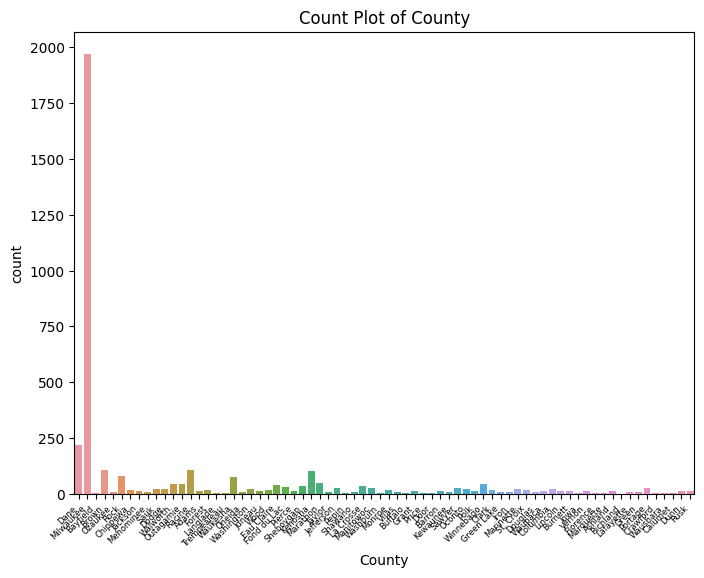

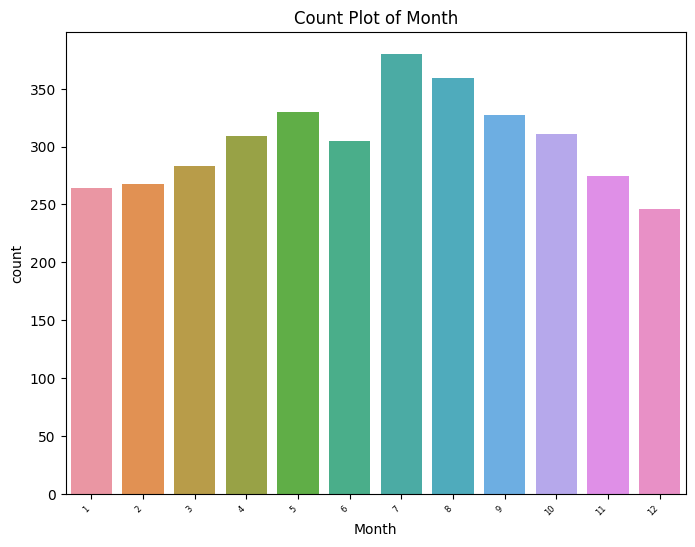

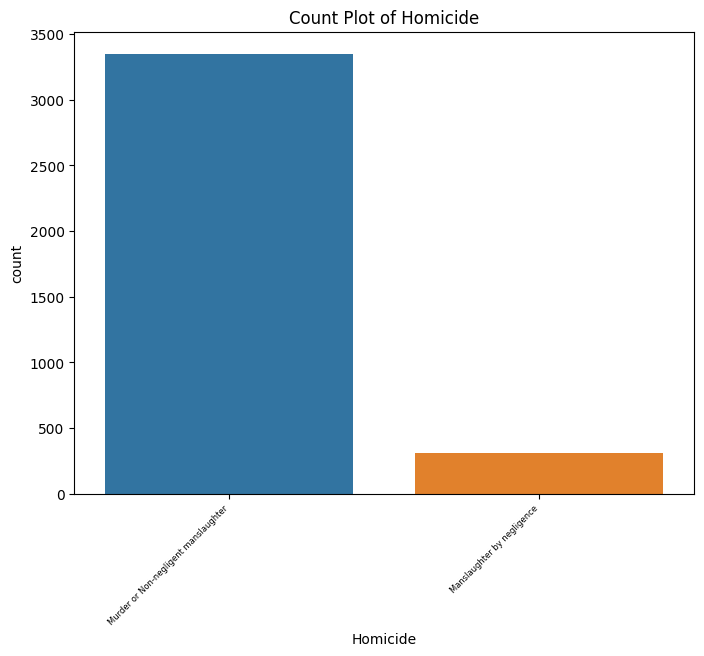

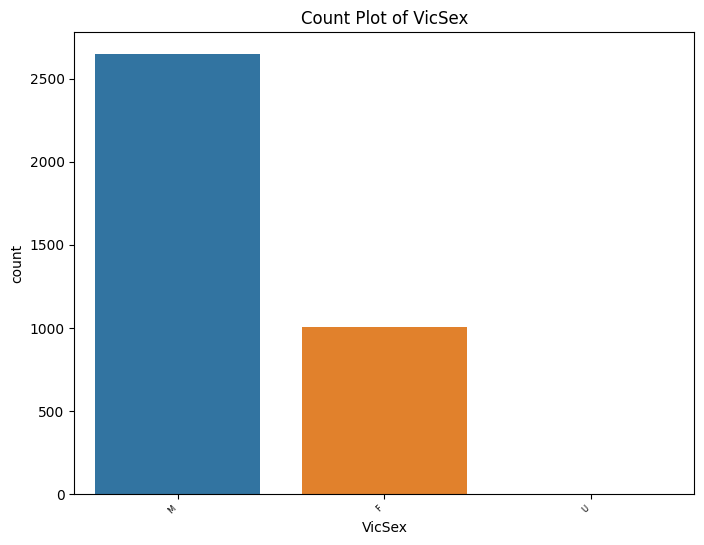

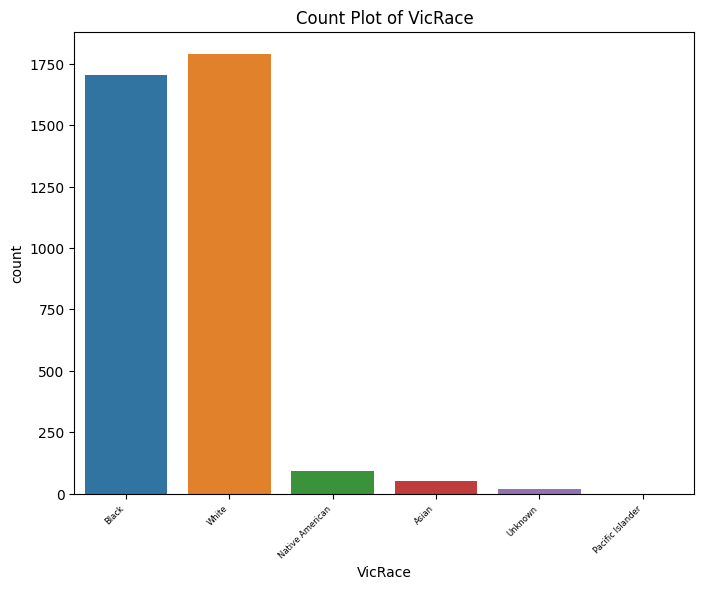

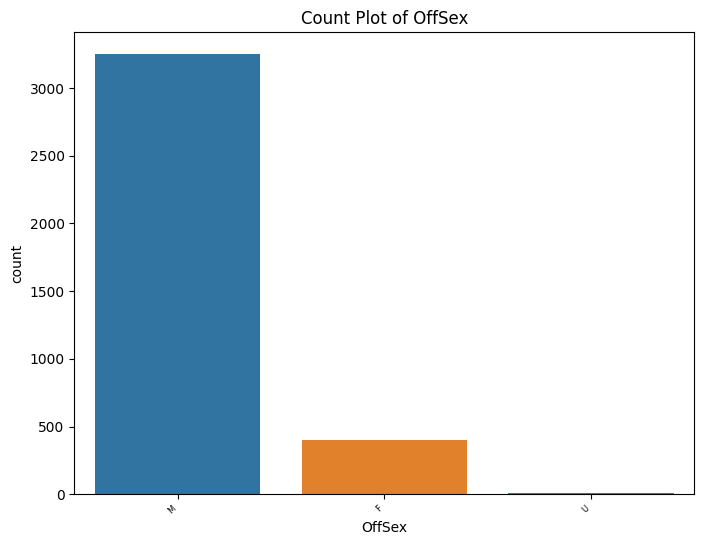

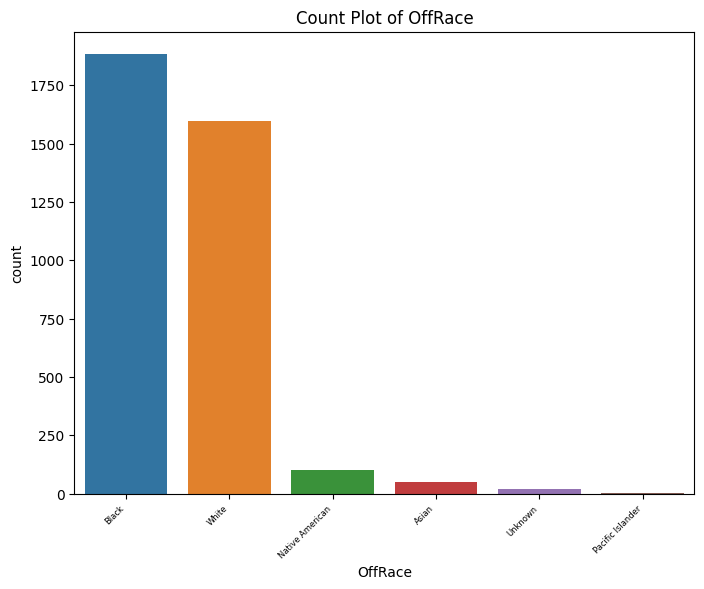

In [ ]:
# Select non-numeric columns
non_numeric_columns = wisc_base.select_dtypes(include=['object']).columns

# Visualize each non-numeric column with adjusted x-labels
for column in non_numeric_columns:
    plt.figure(figsize=(8, 6))
    plot = sn.countplot(data=wisc_base, x=column)
    plt.title(f'Count Plot of {column}')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, fontsize=6, ha="right") # making labels smaller on the x-axis
    plt.show()

Use wisc database if want statistics for Relationship and Curcumstance columns.

<ipython-input-83-e74b02bfb600>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(wisc_base.corr())


<Axes: >

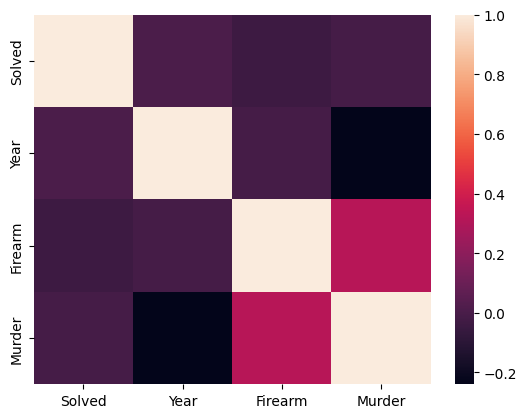

In [ ]:
# Correlation map
sn.heatmap(wisc_base.corr())

## Time Series

In [ ]:
# To perform time series analysis, we need to aggregate the data.
# Counting the number of homicides per year
homicides_per_year = wisc['Year'].value_counts().sort_index() # just WI
homicides_per_year_us = murder['Year'].value_counts().sort_index() # in the whole US

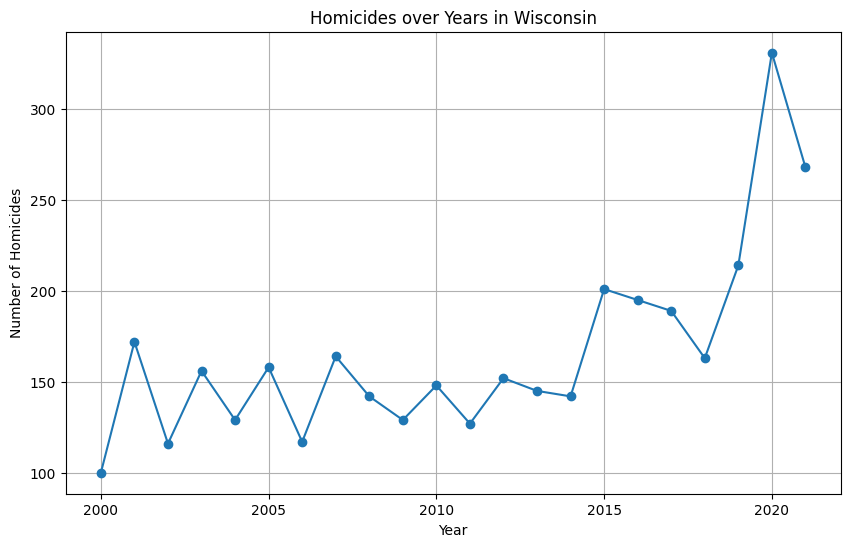

In [ ]:
# Plotting the trend of homicides over the years in WI
plt.figure(figsize=(10, 6))
plt.plot(homicides_per_year.index, homicides_per_year.values, marker='o')
plt.title('Homicides over Years in Wisconsin')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.show()

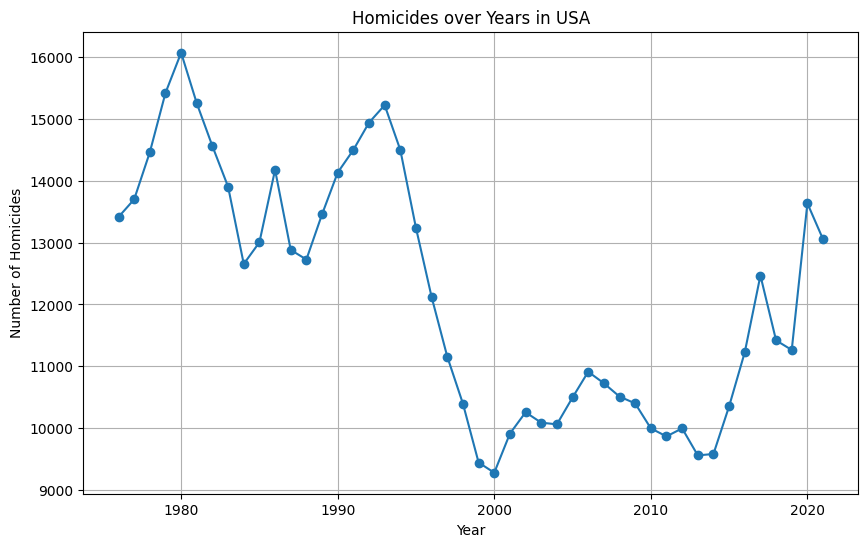

In [ ]:
# Plotting the trend of homicides over the years in all STATES
plt.figure(figsize=(10, 6))
plt.plot(homicides_per_year_us.index, homicides_per_year_us.values, marker='o')
plt.title('Homicides over Years in USA')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.show()

In [ ]:
print(wisc.columns)

Index(['County', 'Solved', 'Year', 'Month', 'VicAge', 'VicSex', 'VicRace',
       'OffAge', 'OffSex', 'OffRace', 'Relationship', 'Circumstance',
       'Firearm', 'Murder'],
      dtype='object')


In [ ]:
print(wisc_base.columns)

Index(['County', 'Solved', 'Year', 'Month', 'VicAge', 'VicSex', 'VicRace',
       'OffAge', 'OffSex', 'OffRace', 'Firearm', 'Murder'],
      dtype='object')


# NLP


Frequency Analysis:

  Word Frequency: Count the occurrence of each unique word in the 'Weapon' and 'Relationship' columns to identify the most common weapons or relationships.

Word Clouds:

  Create Word Clouds: Generate word clouds for 'Weapon' and 'Relationship' columns to represent the importance of words. Larger words indicate higher frequency.



using wisc dataframe



Handgun - pistol, revolver, etc         1523
Firearm, type not stated                 481
Knife or cutting instrument              442
Other or type unknown                    346
Personal weapons, includes beating       265
Rifle                                    153
Blunt object - hammer, club, etc         112
Shotgun                                  108
Narcotics or drugs, sleeping pills        95
Asphyxiation - includes death by gas      80
Name: Weapon, dtype: int64


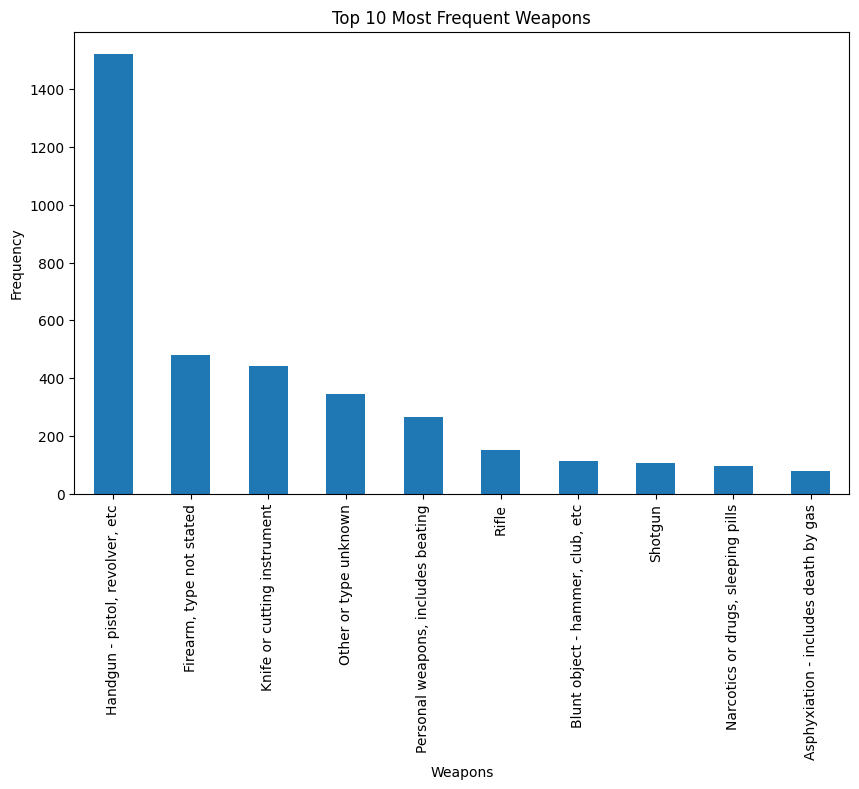

In [ ]:
weapon_frequency = wisc['Weapon'].value_counts()

# Display the top 10 most frequent weapons
top_10_weapons = weapon_frequency.head(10)
print(top_10_weapons)

# Plotting a bar chart for weapons
top_10_weapons.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Most Frequent Weapons')
plt.xlabel('Weapons')
plt.ylabel('Frequency')
plt.show()

Relationship not determined    872
Stranger                       727
Acquaintance                   626
Other - known to victim        310
Friend                         191
Girlfriend                     175
Wife                           139
Son                            115
Other family                    88
Daughter                        74
Name: Relationship, dtype: int64


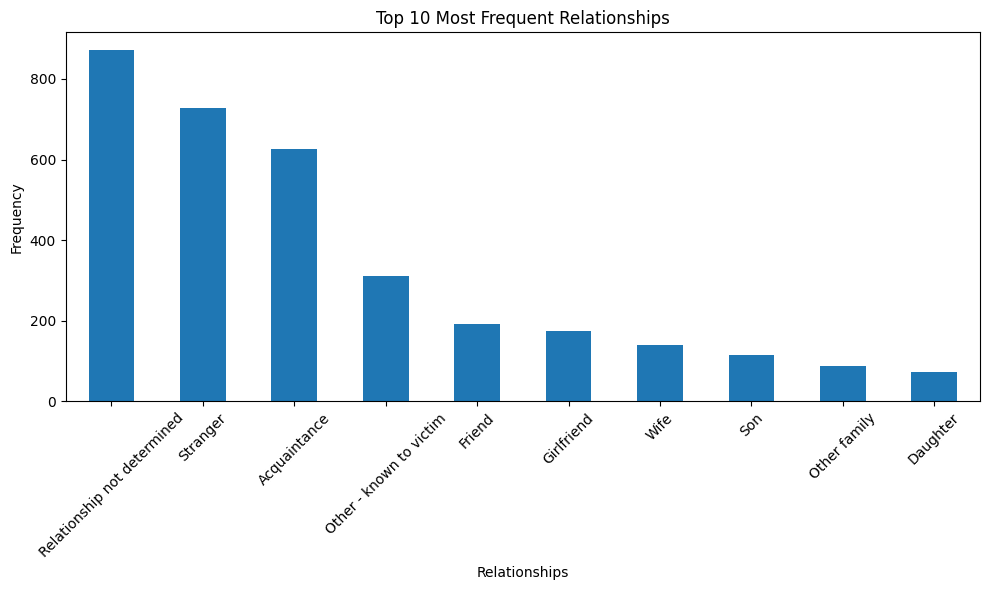

In [ ]:
relationship_frequency = wisc['Relationship'].value_counts()

# Display the top 10 most frequent relationships
top_10_relationships = relationship_frequency.head(10)
print(top_10_relationships)

# Plotting a bar chart for relationships with rotated x-labels
top_10_relationships.plot(kind='bar', figsize=(10, 6)
                         ).set_xticklabels(top_10_relationships.index, rotation=45)
plt.title('Top 10 Most Frequent Relationships')
plt.xlabel('Relationships')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Sentiment Analysis - Weapon

In [ ]:
# Sentiment Analysis
from textblob import TextBlob

sentiments = wisc['Weapon'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
wisc['Sentiment'] = sentiments

# Check the sentiments for each text
print(wisc[['Weapon', 'Sentiment']])

                                Weapon  Sentiment
0      Handgun - pistol, revolver, etc     0.0000
1                Other or type unknown    -0.1125
2      Handgun - pistol, revolver, etc     0.0000
3      Handgun - pistol, revolver, etc     0.0000
4          Knife or cutting instrument    -0.6000
...                                ...        ...
3653   Handgun - pistol, revolver, etc     0.0000
3654   Handgun - pistol, revolver, etc     0.0000
3655          Firearm, type not stated     0.0000
3656  Blunt object - hammer, club, etc     0.0000
3657          Firearm, type not stated     0.0000

[3658 rows x 2 columns]


## Word cloud - Weapon

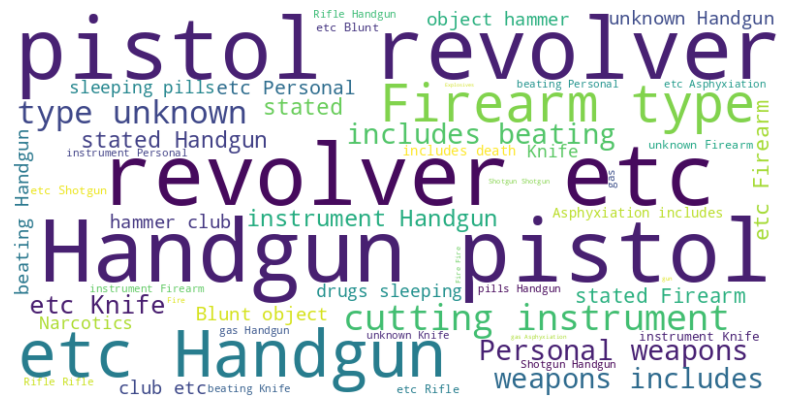

In [ ]:
from wordcloud import WordCloud
# Wordcloud
text_combined = ' '.join(wisc['Weapon'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Word Clound - County

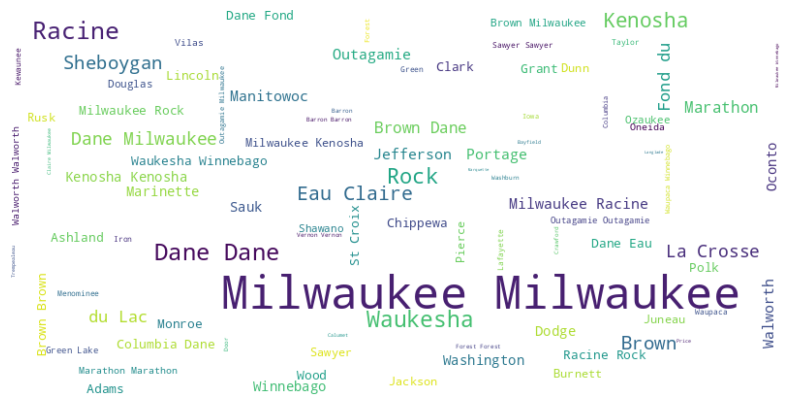

In [ ]:
text_combined = ' '.join(wisc['County'])  # Combine all texts into a single string

wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()